# PREDIKSI DAN SEGMENTASI RISIKO DIABETES PADA PASIEN PIMA INDIAN MENGGUNAKAN K-MEANS DAN LOGISTIC REGRESSION

## Business Understanding

**Determine Business Objectives**

Tujuan utama dari proyek ini adalah untuk membantu tenaga medis atau institusi kesehatan dalam mengidentifikasi pasien yang berisiko tinggi mengidap diabetes. Dengan prediksi dini berdasarkan data medis, tindakan pencegahan atau penanganan lebih lanjut dapat dilakukan secara proaktif, sehingga dapat menurunkan risiko komplikasi kesehatan yang lebih serius di kemudian hari.

**Assess Situation**
*   Sumber Data: Dataset berasal dari National Institute of Diabetes and Digestive and Kidney Diseases dan tersedia secara publik melalui platform Kaggle. Data ini hanya mencakup perempuan berusia ≥21 tahun dari suku Pima Indian
https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database/
*   Kendala:
Data terbatas pada satu kelompok etnis dan gender. Dan terdapat nilai nol atau tidak masuk akal pada beberapa kolom medis (seperti tekanan darah, BMI, kadar insulin).

**Determine Analytical Goals**

Tujuan analitik dari proyek ini adalah:
*   Supervised Learning: Membangun model klasifikasi untuk memprediksi apakah seorang pasien menderita diabetes (menggunakan Logistic Regression atau Naïve Bayes).
*   Unsupervised Learning: Melakukan segmentasi pasien berdasarkan karakteristik medis menggunakan algoritma K-Means Clustering untuk mengidentifikasi pola atau kelompok risiko.

**Produce Project Plan**

Rencana kerja proyek berdasarkan metodologi CRISP-DM:
- Understanding Data: Memuat dan memahami struktur dataset (variabel, tipe data, distribusi).
- Data Preparation: Pembersihan data, menangani missing values, normalisasi/standarisasi, dll.
- Modeling:
  1. Supervised: Membangun dan evaluasi model klasifikasi (Logistic Regression atau Naïve Bayes).
  2. Unsupervised: Melakukan clustering dengan K-Means
- Evaluation: Menilai kinerja model dengan metrik seperti akurasi, precision, recall, dan visualisasi clustering.
- Deployment: Hasil akhir disajikan dalam bentuk laporan, presentasi, dan di-deploy dalam web dashboard interaktif.

##Data Understanding

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Membaca dan menampilkan beberapa baris awal untuk memahami struktur data

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/ulhaqdhifulloh/TUBES-DATMIN-TEAM2-SI4706/main/diabetes.csv')
df_copy = df.copy()
df_copy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Melihat informasi tentang tipe data, kolom, jumlah nilai nol, penggunaan memori, bentuk, dll

In [3]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df_copy.shape

(768, 9)

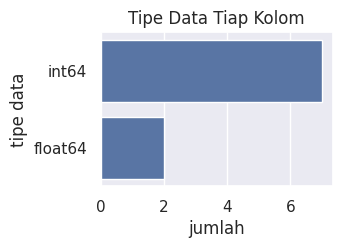

In [5]:
plt.figure(figsize=(3,2))
sns.set(font_scale=1)
sns.countplot(y=df_copy.dtypes ,data=df_copy)
plt.xlabel("jumlah")
plt.ylabel("tipe data")
plt.title("Tipe Data Tiap Kolom")
plt.show()

Melihat statistik deskriptif yang merangkum kecenderungan sentral, dispersi, dan bentuk distribusi set data

In [6]:
df_copy.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


Mengecek duplikasi pada data

In [8]:
print("Jumlah duplikasi data: ",df_copy.duplicated().sum())

Jumlah duplikasi data:  0


Mengecek nilai null pada data

In [9]:
df_copy.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


Mengecek nilai nol yang tidak masuk akal pada data

In [10]:
df_copy = df.copy(deep = True)
df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.nan)
df_copy.isnull().sum()

,0
Pregnancies,0
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,0


Melihat distribusi data

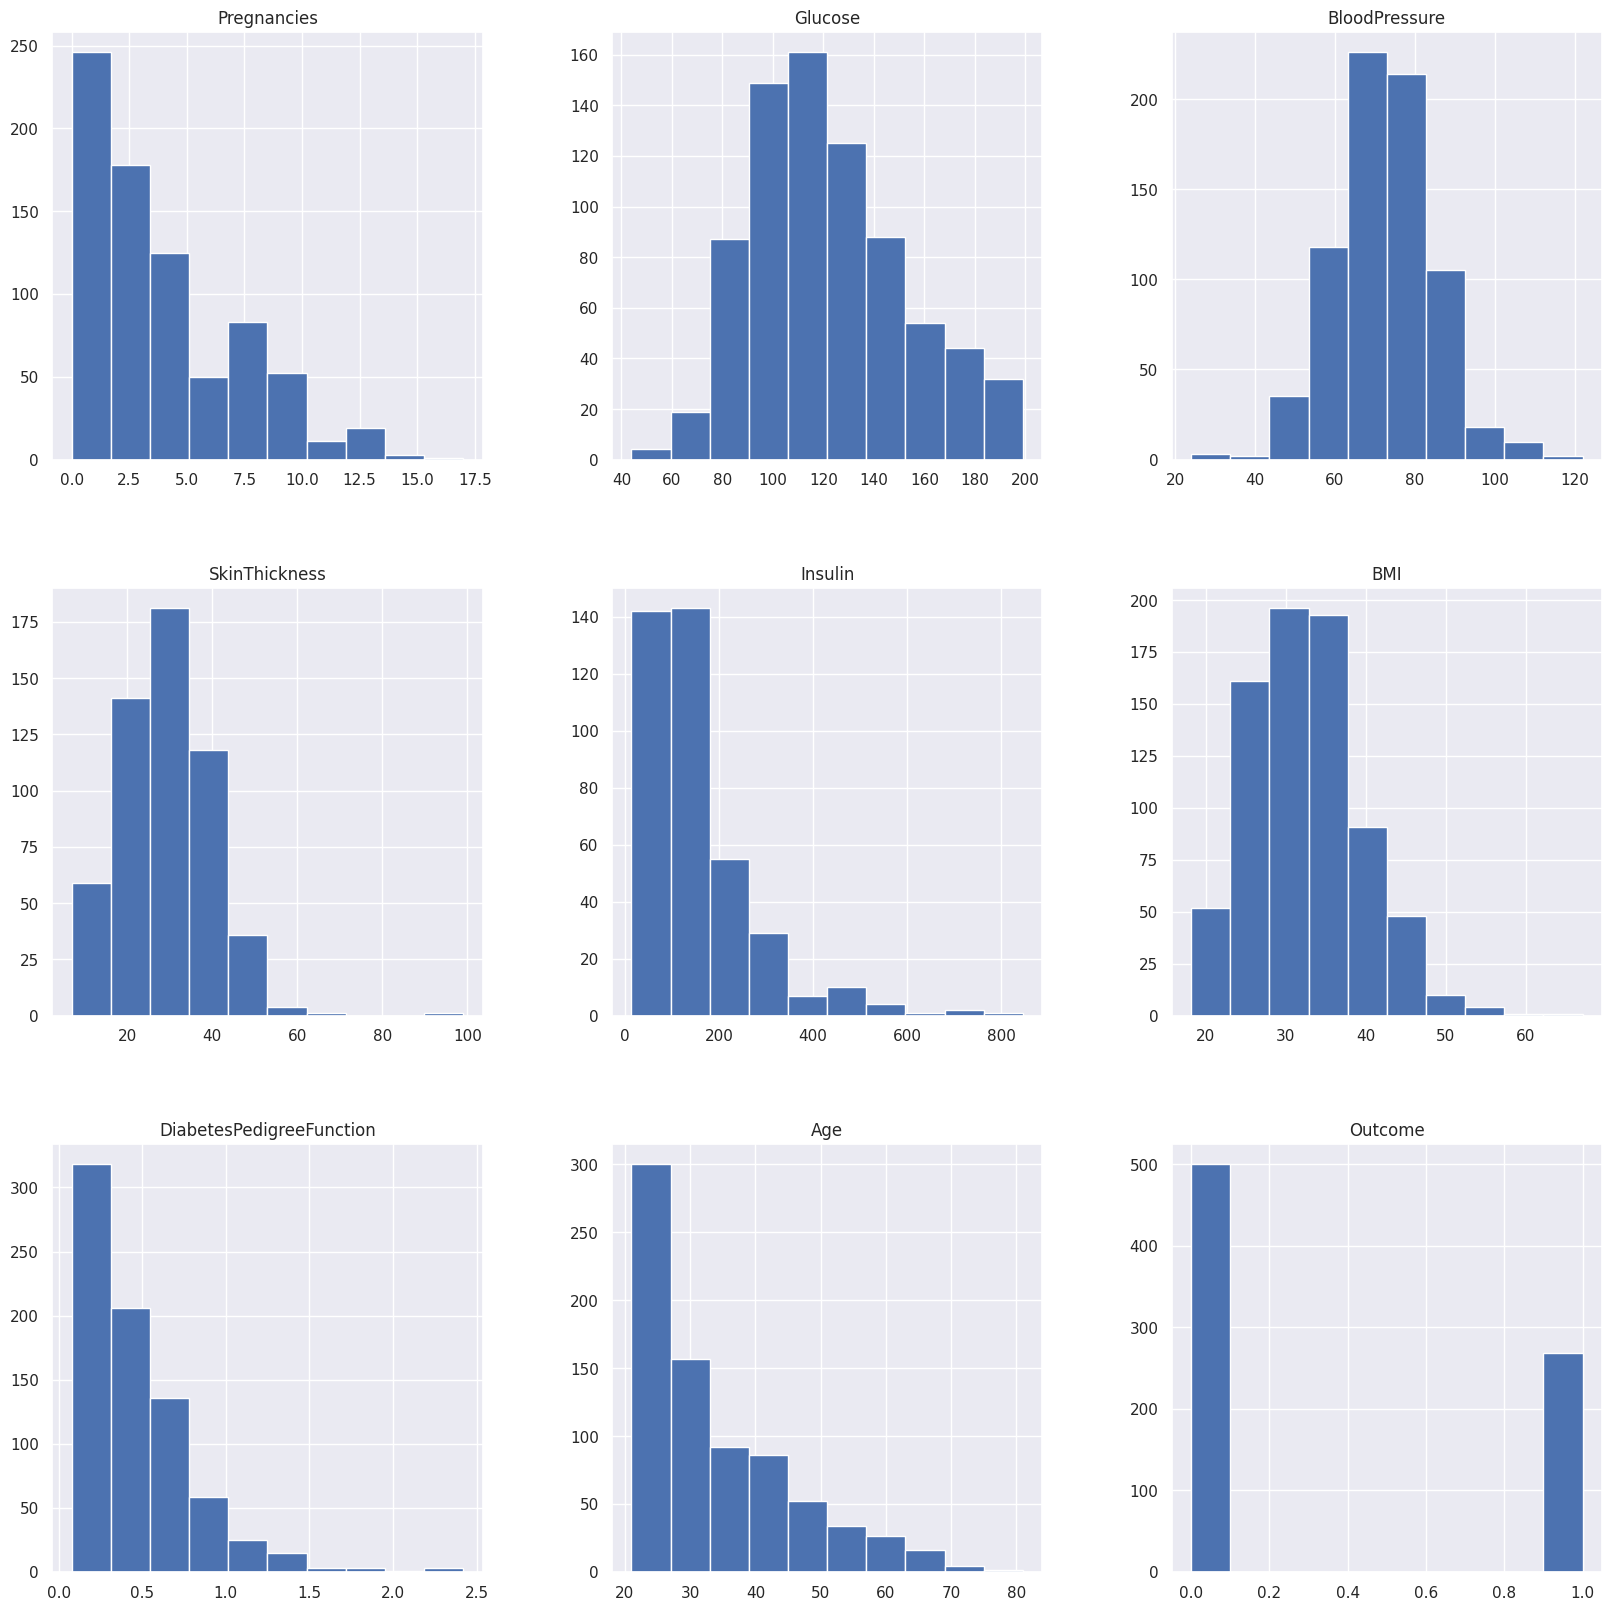

In [11]:
p = df_copy.hist(figsize = (20,20))

Memeriksa korelasi data (heatmap)

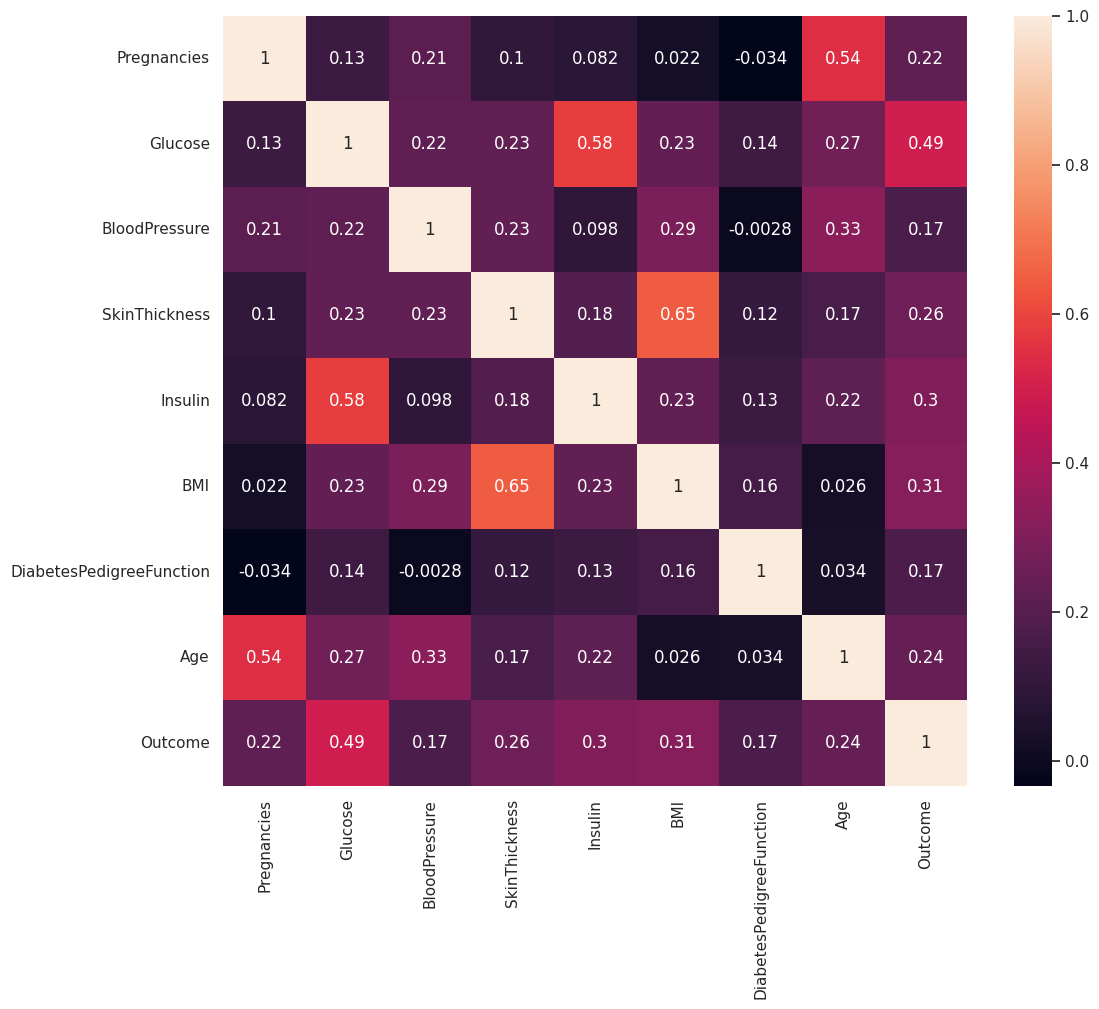

In [12]:
plt.figure(figsize=(12,10))
p=sns.heatmap(df_copy.corr(), annot=True)

Distribusi Target (Outcome)

Outcome
0    500
1    268
Name: count, dtype: int64


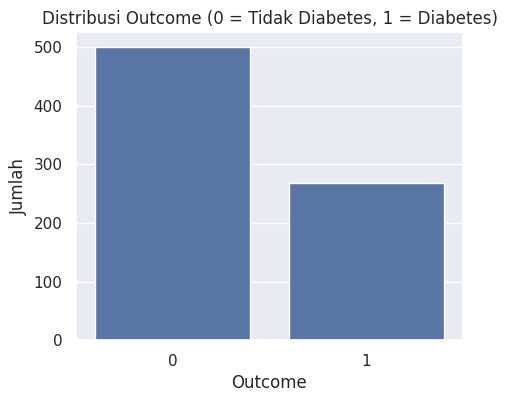

In [13]:
print(df_copy.Outcome.value_counts())
plt.figure(figsize=(5, 4))
sns.countplot(x='Outcome', data=df_copy)
plt.title("Distribusi Outcome (0 = Tidak Diabetes, 1 = Diabetes)")
plt.xlabel("Outcome")
plt.ylabel("Jumlah")
plt.show()

Pair Plot (Scatter Matrix)

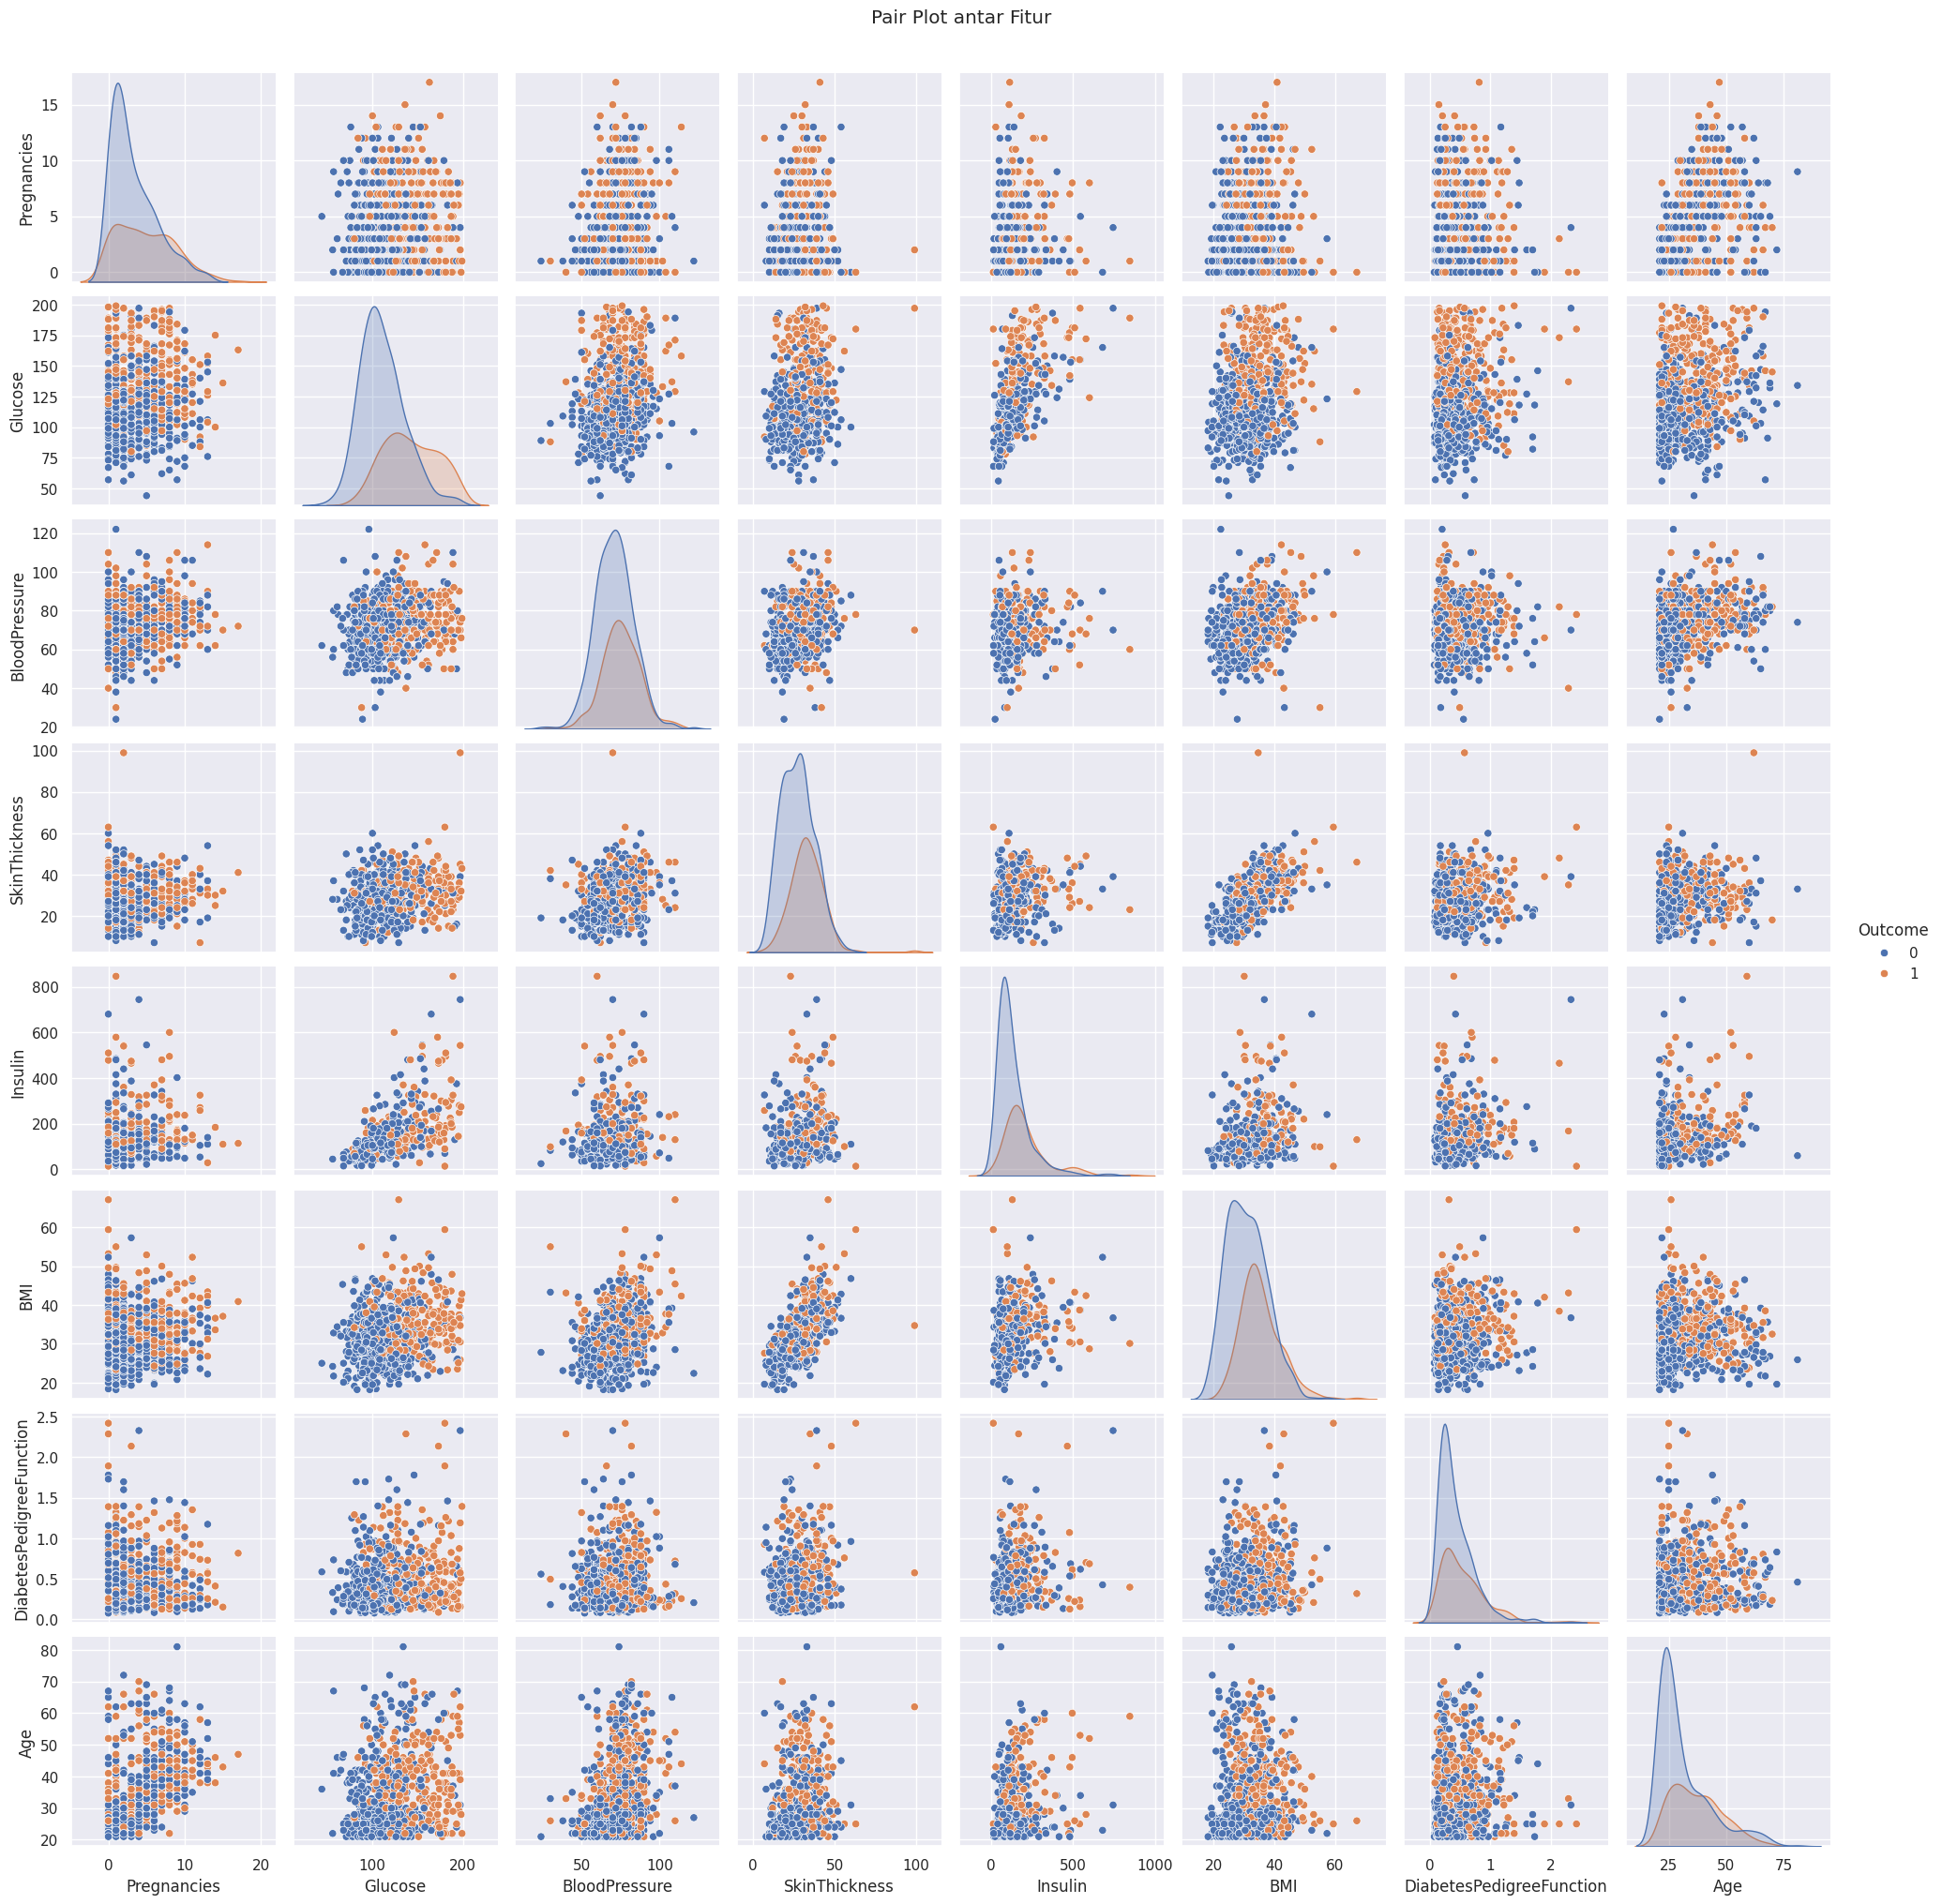

In [14]:
sns.pairplot(df_copy, hue="Outcome")
plt.suptitle("Pair Plot antar Fitur", y=1.02)
plt.show()

Outlier Detection

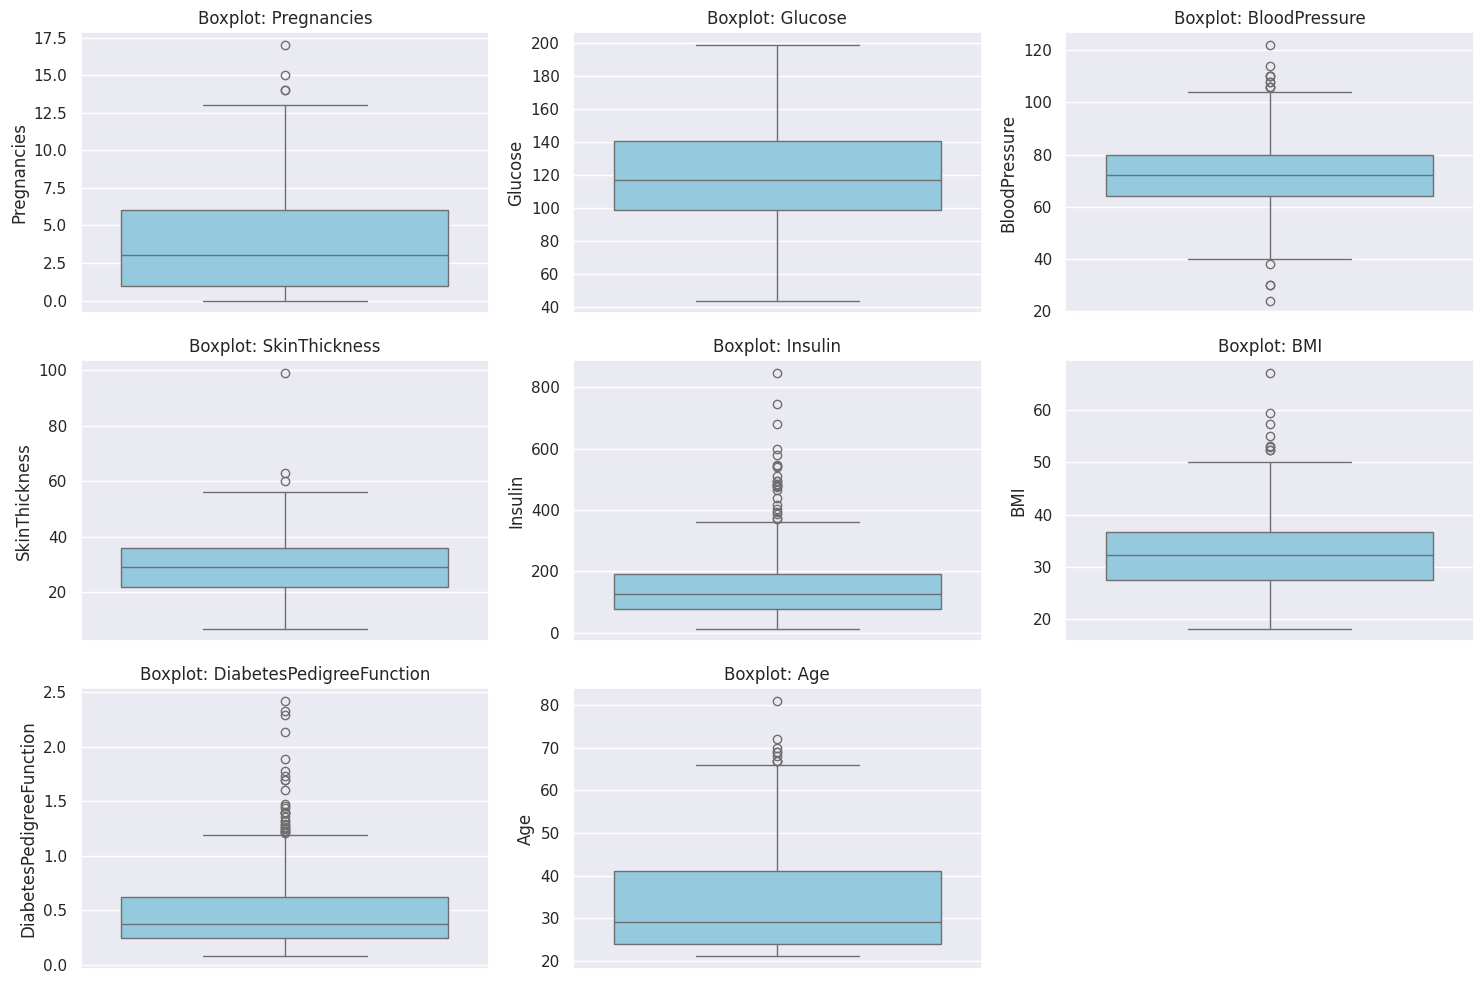

In [15]:
plt.figure(figsize=(15, 10))

for i, col in enumerate(df_copy.select_dtypes(include='number').columns):
    if col != 'Outcome':
        plt.subplot(3, 3, i+1)
        sns.boxplot(data=df_copy, y=col, color='skyblue')
        plt.title(f'Boxplot: {col}')
        plt.tight_layout()

plt.show()

**Kesimpulan:**

Dalam dataset Pima Indians Diabetes, ditemukan bahwa beberapa kolom memiliki nilai minimum nol (0) yang secara medis tidak masuk akal dan mengindikasikan nilai yang hilang (missing values tersembunyi). Kolom-kolom tersebut adalah:
- Glucose
- BloodPressure
- SkinThickness
- Insulin
- BMI

Secara logis, seseorang tidak mungkin memiliki kadar glukosa, tekanan darah, insulin, ketebalan kulit, atau BMI bernilai nol, sehingga nilai-nilai tersebut tidak valid sebagai pengukuran medis.

##Data Preparation

In [16]:
import numpy as np
from sklearn.preprocessing import StandardScaler

###Data Cleansing

Drop Duplikasi Data

In [17]:
df_copy = df_copy.drop_duplicates()

Penanganan Nilai Tidak Valid

In [18]:
cols_with_zero_invalid = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df_copy[cols_with_zero_invalid] = df_copy[cols_with_zero_invalid].replace(0, np.nan)

In [19]:
df_copy['Glucose'].fillna(df_copy['Glucose'].mean(), inplace=True)
df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].mean(), inplace=True)
df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].median(), inplace=True)
df_copy['Insulin'].fillna(df_copy['Insulin'].median(), inplace=True)
df_copy['BMI'].fillna(df_copy['BMI'].median(), inplace=True)

<ipython-input-19-00e9e6e5c7b3>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy['Glucose'].fillna(df_copy['Glucose'].mean(), inplace=True)
<ipython-input-19-00e9e6e5c7b3>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

Deteksi dan Penanganan Outlier

In [20]:
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    iqr = quartile3 - quartile1
    lower = quartile1 - 1.5 * iqr
    upper = quartile3 + 1.5 * iqr
    return lower, upper

def replace_with_thresholds(dataframe, variable):
    low, up = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low), variable] = low
    dataframe.loc[(dataframe[variable] > up), variable] = up

for col in df_copy.columns[:-1]:  # exclude Outcome
    replace_with_thresholds(df_copy, col)

<ipython-input-20-8f824cd35c8f>:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-6.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataframe.loc[(dataframe[variable] < low), variable] = low
<ipython-input-20-8f824cd35c8f>:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-1.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataframe.loc[(dataframe[variable] < low), variable] = low


###Data Transformation

Feature Scaling (Standarisasi)

In [21]:
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(df_copy.drop(columns=['Outcome'])),
                        columns=df_copy.drop(columns=['Outcome']).columns)
y = df_copy['Outcome']
df = pd.concat([X_scaled, y], axis=1)

In [22]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.647150,0.865108,-0.032212,0.824667,0.039062,0.181092,0.588927,1.445691,1
1,-0.848970,-1.206162,-0.545506,0.017945,0.039062,-0.869465,-0.378101,-0.189304,0
2,1.245598,2.015813,-0.716604,0.017945,0.039062,-1.364728,0.746595,-0.103252,1
3,-0.848970,-1.074652,-0.545506,-0.788777,-1.494110,-0.644346,-1.022787,-1.049828,0
4,-1.148194,0.503458,-2.769778,0.824667,1.414175,1.606849,2.596563,-0.017199,1


###Data Balancing

Random Oversampling

In [23]:
major = df[df['Outcome'] == 0].copy()
minor = df[df['Outcome'] == 1].copy()

In [24]:
minor_oversampled = minor.sample(n=len(major), replace=True, random_state=42)

In [25]:
df = pd.concat([major, minor_oversampled])
df = df.reset_index(drop=True)

Outcome
0    500
1    500
Name: count, dtype: int64


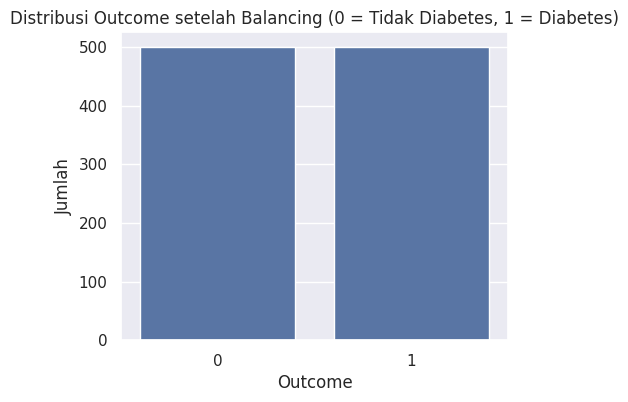

In [26]:
print(df.Outcome.value_counts())
plt.figure(figsize=(5, 4))
sns.countplot(x='Outcome', data=df)
plt.title("Distribusi Outcome setelah Balancing (0 = Tidak Diabetes, 1 = Diabetes)")
plt.xlabel("Outcome")
plt.ylabel("Jumlah")
plt.show()

##Modeling

###Model Logistic Regression

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import cross_validate
import statsmodels.api as sm
import numpy as np
from sklearn.model_selection import GridSearchCV

####Split Dataset

In [28]:
X = df.drop(['Outcome'], axis=1)
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

####Build model

Menginisiasi dan melatih model logistic regression

In [29]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

Membuat prediksi dari model yang sudah dilatih

In [30]:
y_pred_log = log_reg.predict(X_test)
y_pred_log

array([1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1])

####Evaluasi Model

Menampilkan intercept dan koefisien

In [31]:
intercept = log_reg.intercept_
coefficients = log_reg.coef_
print("Intercept:", intercept)
print("Koefisien:", coefficients)

Intercept: [-0.20153479]
Koefisien: [[0.44802335 1.11847366 0.01326991 0.15240595 0.15899971 0.56139532
  0.19817666 0.11432394]]


Mendapatkan p-value dari model

In [32]:
X_const = sm.add_constant(X)

logit_model = sm.Logit(y, X_const)
result = logit_model.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.507234
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      991
Method:                           MLE   Df Model:                            8
Date:                Tue, 27 May 2025   Pseudo R-squ.:                  0.2682
Time:                        18:04:44   Log-Likelihood:                -507.23
converged:                       True   LL-Null:                       -693.15
Covariance Type:            nonrobust   LLR p-value:                 1.976e-75
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -0.1920      0.079     -2.441      0.015      -0.346

Menampilkan p-value dari variabel prediktor

In [33]:
print("P-value variabel prediktor:")
print(result.pvalues)

P-value variabel prediktor:
const                       1.464570e-02
Pregnancies                 1.332454e-05
Glucose                     1.828779e-24
BloodPressure               7.491303e-01
SkinThickness               1.831140e-01
Insulin                     1.859391e-01
BMI                         4.106807e-07
DiabetesPedigreeFunction    2.939180e-03
Age                         3.988005e-02
dtype: float64


Membuat prediksi dari model yang sudah dilatih

In [34]:
y_pred_log = log_reg.predict(X_test)

Menampilkan akurasi hasil prediksi model

In [35]:
accuracy = accuracy_score(y_test, y_pred_log)
print("Akurasi :", accuracy)

Akurasi : 0.725


Menampilkan Confusion Matrix

In [36]:
conf_matrix = confusion_matrix(y_test, y_pred_log)
conf_matrix

array([[74, 26],
       [29, 71]])

Menampilkan classification report hasil prediksi model

In [37]:
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.72      0.74      0.73       100
           1       0.73      0.71      0.72       100

    accuracy                           0.72       200
   macro avg       0.73      0.72      0.72       200
weighted avg       0.73      0.72      0.72       200



###Model K-Means Clustering

In [38]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.model_selection import ParameterGrid

####Split Dataset

Pilih kolom yang akan digunakan dalam pembuatan K-Means

In [39]:
X = df_copy.drop('Outcome', axis=1)

####Build model

Elbow Method untuk menemukan jumlah klaster yang optimal

In [40]:
inertia = []
range_n_clusters = range(1, 13)

for k in range_n_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

Visualisasi plot Elbow Method

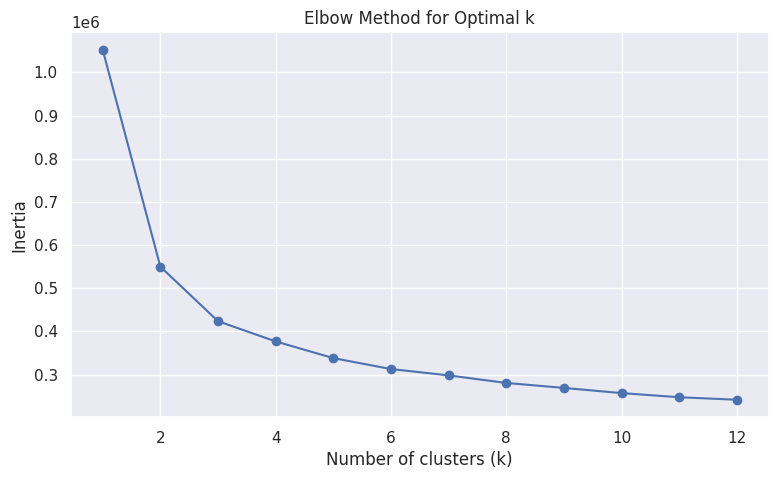

In [41]:
plt.figure(figsize=(9,5))
plt.plot(range_n_clusters, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

Untuk contoh, kita asumsikan 2 cluster (non-diabetes dan diabetes)

In [42]:
optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
labels = kmeans.fit_predict(X)

Tetapkan label cluster untuk Author

In [43]:
X['Cluster'] = labels

####Evaluasi model Before

Visualisasi menggunakan PCA (Principal Component Analysis)

In [44]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X.drop('Cluster', axis=1))

pca_df = pd.DataFrame(data=pca_components, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = X['Cluster']

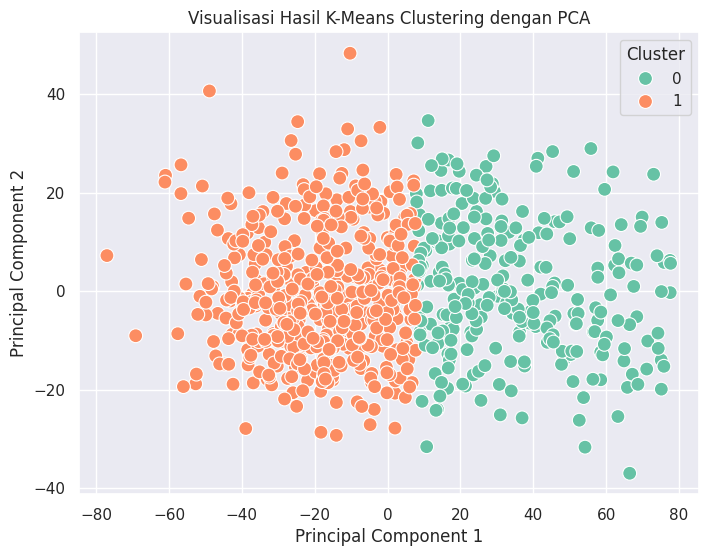

In [45]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=pca_df, palette='Set2', s=100)
plt.title('Visualisasi Hasil K-Means Clustering dengan PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

Menghitung Silhouette Score

In [46]:
silhouette_avg = silhouette_score(X.drop('Cluster', axis=1), labels)
print('silhouette score untuk', optimal_k, 'cluster adalah', silhouette_avg)

silhouette score untuk 2 cluster adalah 0.3991467770164858


####Model Tuning

Import library

In [47]:
from sklearn.model_selection import GridSearchCV

Tentukan parameter yang ingin dicoba

In [48]:
param_grid = {
    'n_clusters': range(2, 11),
    'init': ['k-means++', 'random'],
    'n_init': [10, 20],
    'max_iter': [300, 500]
}

Inisialisasi GridSearchCV

In [49]:
kmeans = KMeans(random_state=42)
grid_search = GridSearchCV(kmeans, param_grid=param_grid, cv=3)

####Evaluasi Model After

Tampilkan hasil (parameter dan silhouute score) dari Grid Search

In [50]:
best_score = -1
best_params = None

In [51]:
for params in ParameterGrid(param_grid):
    kmeans = KMeans(
        n_clusters=params['n_clusters'],
        init=params['init'],
        n_init=params['n_init'],
        max_iter=params['max_iter'],
        random_state=42
    )
    labels = kmeans.fit_predict(X.drop('Cluster', axis=1))
    score = silhouette_score(X.drop('Cluster', axis=1), labels)

    if score > best_score:
        best_score = score
        best_params = params

hasil dari Grid Search untuk parameter dan skor terbaik

In [52]:
print("Best Silhouette Score:", best_score)
print("Best Parameters:", best_params)

Best Silhouette Score: 0.406205158226528
Best Parameters: {'init': 'k-means++', 'max_iter': 300, 'n_clusters': 2, 'n_init': 10}


##Deployment

###Save Model

In [53]:
from joblib import dump
dump(log_reg, 'logistic_model.joblib')
dump(kmeans, 'kmeans_model.joblib')
dump(scaler, 'scaler.joblib')

['scaler.joblib']

###Konfigurasi Streamlit untuk deployment

In [ ]:
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, confusion_matrix, roc_curve,
                             roc_auc_score, silhouette_score)
from joblib import load
# KMeans dari sklearn.cluster mungkin tidak perlu diimpor jika hanya load, tapi tidak apa-apa jika ada
from sklearn.cluster import KMeans

# Initialize session state for active tab (opsional, bisa dihapus jika tidak digunakan aktif)
# if 'active_tab' not in st.session_state:
#     st.session_state.active_tab = "Gambaran Umum"

# Set page config
st.set_page_config(
    page_title="Dashboard Prediksi dan Segmentasi Risiko Diabetes",
    page_icon="🩺",
    layout="wide"
)

# --- DATA LOADING, PREPARATION, AND MODEL LOADING ---
@st.cache_resource # Cache untuk resource yang berat seperti model
def load_all_assets():
    log_reg = load('logistic_model.joblib')
    scaler = load('scaler.joblib')

    # Muat dan proses data HANYA SEKALI
    df_initial = pd.read_csv('https://raw.githubusercontent.com/ulhaqdhifulloh/TUBES-DATMIN-TEAM2-SI4706/main/diabetes.csv')

    df_processed = df_initial.copy() # Kita akan memproses dataframe ini

    # Handle missing values (nilai nol yang tidak valid)
    cols_with_zero_invalid = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
    df_processed[cols_with_zero_invalid] = df_processed[cols_with_zero_invalid].replace(0, np.nan)

    # Isi NaN (sesuai strategi di notebook: mean untuk Glucose, BloodPressure; median untuk lainnya)
    df_processed['Glucose'].fillna(df_processed['Glucose'].mean(), inplace=True)
    df_processed['BloodPressure'].fillna(df_processed['BloodPressure'].mean(), inplace=True)
    df_processed['SkinThickness'].fillna(df_processed['SkinThickness'].median(), inplace=True)
    df_processed['Insulin'].fillna(df_processed['Insulin'].median(), inplace=True)
    df_processed['BMI'].fillna(df_processed['BMI'].median(), inplace=True)

    # Definisikan kolom fitur (HARUS 8 FITUR, SESUAI SAAT TRAINING SCALER DAN SEMUA MODEL)
    feature_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
                    'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

    # Pisahkan fitur dan target sebelum scaling
    X_for_scaling = df_processed[feature_cols]
    y_outcome = df_processed['Outcome'].copy() # Salin untuk menghindari SettingWithCopyWarning

    # Scaling fitur menggunakan scaler yang sudah di-load
    X_scaled_np = scaler.transform(X_for_scaling)

    # Inisialisasi dan latih model K-Means dengan parameter yang dioptimalkan
    kmeans_model = KMeans(
        n_clusters=2,  # Sesuai dengan model utama
        init='k-means++',  # Metode inisialisasi yang dioptimalkan
        n_init=10,  # Jumlah inisialisasi yang dioptimalkan
        max_iter=300,  # Jumlah iterasi maksimum yang dioptimalkan
        random_state=42
    )
    kmeans_model.fit(X_scaled_np)

    return log_reg, scaler, kmeans_model, X_scaled_np, y_outcome, df_processed, feature_cols

# Load semua aset (model, scaler, data yang diproses dan di-scale)
log_reg, scaler, kmeans_model, X_full_scaled, y_full, df_display, feature_columns = load_all_assets()
# X_full_scaled adalah NumPy array dengan 8 fitur yang sudah di-scaling
# y_full adalah Series Pandas untuk Outcome
# df_display adalah DataFrame Pandas yang sudah diproses (NaN handling) tapi belum di-scale, bisa untuk tampilan umum

# --- UI LAYOUT ---
st.title("Dashboard Interaktif: Analisis Risiko & Segmentasi Diabetes Pasien Pima Indian")
st.markdown("""
Selamat datang di dashboard analisis risiko diabetes. Dashboard ini bertujuan untuk:
- Membantu identifikasi dini pasien yang berisiko tinggi mengidap diabetes.
- Melakukan segmentasi pasien berdasarkan karakteristik medis untuk pemahaman yang lebih baik.
""")

# Create tabs
tab1, tab2, tab3 = st.tabs([
    "🏠 Gambaran Umum & Info Dasar",
    "🩸 Prediksi Risiko Diabetes",
    "⚕️ Segmentasi Pasien & Karakteristik"
])

# --- TAB 1: Gambaran Umum & Info Dasar ---
with tab1:
    st.header("Gambaran Umum Proyek")

    st.subheader("A. Pemahaman Bisnis (Business Understanding)")
    st.markdown("""
    Tujuan utama dari proyek ini adalah untuk membantu tenaga medis atau institusi kesehatan dalam
    mengidentifikasi pasien yang berisiko tinggi mengidap diabetes. Dengan prediksi dini berdasarkan
    data medis, tindakan pencegahan atau penanganan lebih lanjut dapat dilakukan secara proaktif,
    sehingga dapat menurunkan risiko komplikasi kesehatan yang lebih serius di kemudian hari.
    """)

    st.subheader("B. Pemahaman Data (Data Understanding) & Analisis Data Awal")
    st.markdown("""
    Sumber Data: Dataset berasal dari *National Institute of Diabetes and Digestive and Kidney Diseases* dan tersedia secara publik melalui platform Kaggle. Data ini hanya mencakup perempuan berusia ≥21 tahun
    dari suku Pima Indian.
    """)

    st.markdown("**Distribusi Pasien Diabetes dalam Dataset:**")
    outcome_counts = df_display['Outcome'].value_counts() # Gunakan df_display
    fig_outcome, ax_outcome = plt.subplots(figsize=(6,4))
    outcome_counts.plot(kind='pie', ax=ax_outcome, autopct='%1.1f%%', startangle=90,
                        labels=['Tidak Diabetes (0)', 'Diabetes (1)'], colors=['skyblue', 'salmon'])
    ax_outcome.set_ylabel('')
    st.pyplot(fig_outcome)

    with st.expander("Lihat Statistik Deskriptif & Contoh Data"):
        st.markdown("**Statistik Deskriptif Fitur (Sebelum Scaling):**")
        st.dataframe(df_display[feature_columns].describe()) # Gunakan df_display
        st.markdown("**Contoh Data (5 Baris Pertama, Sebelum Scaling):**")
        st.dataframe(df_display.head()) # Gunakan df_display

    st.subheader("C. Sekilas Info Model (Model Info - Gambaran Umum)")
    # Ambil n_clusters dari model K-Means yang di-load jika tersedia
    n_clusters_kmeans = kmeans_model.n_clusters if hasattr(kmeans_model, 'n_clusters') else "N/A"
    st.markdown(f"""
    - **Prediksi Risiko:** Menggunakan model **Regresi Logistik**.
    - **Segmentasi Pasien:** Menggunakan algoritma **K-Means Clustering** (dengan {n_clusters_kmeans} segmen).
    """)


# --- TAB 2: Prediksi Risiko Diabetes ---
with tab2:
    st.header("Prediksi Risiko Diabetes (Regresi Logistik)")

    st.subheader("A. Lakukan Prediksi Interaktif")
    with st.form("prediction_form"):
        col1, col2 = st.columns(2)
        # ... (Input fields tetap sama) ...
        with col1:
            pregnancies = st.number_input("Jumlah Kehamilan", min_value=0, max_value=20, value=1, help="Jumlah berapa kali hamil.")
            glucose = st.number_input("Glukosa Plasma (mg/dL)", min_value=0, max_value=300, value=120, help="Konsentrasi glukosa plasma 2 jam dalam tes toleransi glukosa oral.")
            blood_pressure = st.number_input("Tekanan Darah Diastolik (mm Hg)", min_value=0, max_value=150, value=70, help="Tekanan darah diastolik.")
            skin_thickness = st.number_input("Ketebalan Lipatan Kulit Trisep (mm)", min_value=0, max_value=100, value=20, help="Ketebalan lipatan kulit trisep.")
        with col2:
            insulin = st.number_input("Insulin Serum 2 Jam (mu U/ml)", min_value=0, max_value=1000, value=80, help="Insulin serum 2 jam.")
            bmi = st.number_input("Indeks Massa Tubuh (BMI) (kg/m²)", min_value=0.0, max_value=70.0, value=32.0, format="%.1f", help="Indeks massa tubuh.")
            diabetes_pedigree = st.number_input("Diabetes Pedigree Function", min_value=0.0, max_value=3.0, value=0.470, format="%.3f", help="Fungsi silsilah diabetes, skor yang mewakili riwayat keluarga.")
            age = st.number_input("Usia (tahun)", min_value=21, max_value=100, value=33, help="Usia pasien.")
        submit_button = st.form_submit_button(label="Prediksi Risiko Diabetes")

    if submit_button:
        # Buat DataFrame dari input pengguna
        input_data_df = pd.DataFrame([[pregnancies, glucose, blood_pressure, skin_thickness,
                                       insulin, bmi, diabetes_pedigree, age]],
                                     columns=feature_columns)
        # Scaling input pengguna menggunakan scaler yang sudah di-load
        input_scaled_np = scaler.transform(input_data_df) # Hasilnya NumPy array

        # Prediksi menggunakan model Regresi Logistik
        # Model scikit-learn bisa menerima NumPy array jika dilatih dengan cara yang sama
        prediction_proba = log_reg.predict_proba(input_scaled_np)[0][1]
        prediction = log_reg.predict(input_scaled_np)[0]

        st.markdown("---")
        st.subheader("Hasil Prediksi untuk Pasien:")
        if prediction == 1:
            st.error(f"Pasien diprediksi: **BERISIKO DIABETES** 😢 (Probabilitas: {prediction_proba:.2f})")
        else:
            st.success(f"Pasien diprediksi: **TIDAK BERISIKO DIABETES** 😊 (Probabilitas Risiko: {prediction_proba:.2f})")
        st.markdown("---")

    st.subheader("B. Analisis Model Prediksi")
    st.markdown("**Faktor Risiko Utama (Feature Importance):**")
    if hasattr(log_reg, 'coef_'):
        feature_importance_df = pd.DataFrame({
            'Faktor': feature_columns,
            'Pengaruh (Koefisien Regresi Logistik)': log_reg.coef_[0]
        }).sort_values(by='Pengaruh (Koefisien Regresi Logistik)', ascending=False)

        fig_importance, ax_importance = plt.subplots(figsize=(10, 6))
        # Hapus hue='Faktor' jika menyebabkan error atau tidak diinginkan, legend=False sudah ada
        sns.barplot(data=feature_importance_df, x='Pengaruh (Koefisien Regresi Logistik)', y='Faktor',
                    ax=ax_importance, palette="viridis") # legend=False dihapus karena tidak ada hue
        ax_importance.set_title('Pengaruh Faktor Risiko terhadap Prediksi Diabetes')
        st.pyplot(fig_importance)
    else:
        st.warning("Informasi feature importance (koefisien) tidak tersedia untuk model ini.")


    with st.expander("Info & Performa Model Regresi Logistik (Model Info)"):
        st.markdown("**Model:** Regresi Logistik")

        # Evaluasi pada keseluruhan data yang sudah di-load dan di-scale
        y_pred_log_full = log_reg.predict(X_full_scaled) # X_full_scaled adalah NumPy array

        accuracy = accuracy_score(y_full, y_pred_log_full)
        precision = precision_score(y_full, y_pred_log_full, zero_division=0)
        recall = recall_score(y_full, y_pred_log_full, zero_division=0)
        f1 = f1_score(y_full, y_pred_log_full, zero_division=0)

        st.markdown(f"- **Akurasi:** {accuracy:.3f}")
        st.markdown(f"- **Presisi:** {precision:.3f}")
        st.markdown(f"- **Recall:** {recall:.3f}")
        st.markdown(f"- **F1-score:** {f1:.3f}")

        st.markdown("**Confusion Matrix (pada keseluruhan data):**")
        cm = confusion_matrix(y_full, y_pred_log_full)
        fig_cm, ax_cm = plt.subplots(figsize=(6,4))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax_cm,
                    xticklabels=['Tidak Diabetes', 'Diabetes'],
                    yticklabels=['Tidak Diabetes', 'Diabetes'])
        ax_cm.set_xlabel("Prediksi")
        ax_cm.set_ylabel("Aktual")
        ax_cm.set_title("Confusion Matrix")
        st.pyplot(fig_cm)

# --- TAB 3: Segmentasi Pasien & Karakteristik ---
with tab3:
    st.header("Segmentasi Pasien & Karakteristik (K-Means Clustering)")

    # Dapatkan label cluster dari model K-Means yang sudah di-load
    # kmeans_model harusnya bisa predict dari X_full_scaled (NumPy array 8 fitur scaled)
    cluster_labels_full = kmeans_model.predict(X_full_scaled)

    # Buat DataFrame baru untuk tampilan di tab ini, gabungkan fitur asli dengan cluster
    # Ambil fitur asli dari df_display (sebelum scaling) agar mudah diinterpretasi
    df_tab3_analysis = df_display.copy() # Mulai dari data yang sudah bersih (NaN handling)
    df_tab3_analysis['Cluster'] = cluster_labels_full

    st.subheader("A. Visualisasi Segmen Pasien (PCA)")
    # PCA di-fit pada data yang sudah di-scaling (X_full_scaled)
    pca = PCA(n_components=2)
    X_pca_components = pca.fit_transform(X_full_scaled) # X_full_scaled adalah NumPy array

    fig_pca, ax_pca = plt.subplots(figsize=(10, 7))
    scatter = ax_pca.scatter(X_pca_components[:, 0], X_pca_components[:, 1], c=cluster_labels_full, cmap='viridis', alpha=0.7)
    ax_pca.set_xlabel('Principal Component 1')
    ax_pca.set_ylabel('Principal Component 2')
    ax_pca.set_title('Segmentasi Pasien Pima Indian (Visualisasi PCA)')
    try:
        legend1 = ax_pca.legend(*scatter.legend_elements(), title="Clusters")
        ax_pca.add_artist(legend1)
    except (AttributeError, TypeError): # Menangkap TypeError juga jika legend_elements() mengembalikan format tak terduga
        plt.colorbar(scatter, ax=ax_pca, label='Cluster')
    st.pyplot(fig_pca)

    st.subheader("B. Analisis Data & Fitur per Segmen")
    st.markdown("**Karakteristik Rata-Rata per Segmen (Fitur Asli Sebelum Scaling):**")
    # Group by pada df_tab3_analysis yang berisi fitur asli dan label cluster
    cluster_stats_original_features = df_tab3_analysis.groupby('Cluster')[feature_columns].mean()
    st.dataframe(cluster_stats_original_features)

    st.markdown("**Visualisasi Karakteristik Rata-Rata per Segmen (Fitur Asli):**")
    fig_bar_stats, ax_bar_stats = plt.subplots(figsize=(12, 7))
    cluster_stats_original_features.T.plot(kind='bar', ax=ax_bar_stats, colormap="viridis")
    ax_bar_stats.set_title('Perbandingan Karakteristik Rata-rata antar Segmen (Fitur Asli)')
    ax_bar_stats.set_ylabel('Nilai Rata-rata Fitur')
    ax_bar_stats.tick_params(axis='x', rotation=45)
    plt.tight_layout()
    st.pyplot(fig_bar_stats)

    with st.expander("Interpretasi Segmen & Info Model K-Means (Model Info)"):
        n_clusters_kmeans_tab3 = kmeans_model.n_clusters if hasattr(kmeans_model, 'n_clusters') else "N/A"
        st.markdown(f"**Model:** K-Means Clustering (dengan {n_clusters_kmeans_tab3} segmen)")

        # Silhouette score dihitung pada data yang di-scaling
        # Tambahkan pengecekan jumlah label unik
        unique_labels = np.unique(cluster_labels_full)
        if len(unique_labels) >= 2:
            sil_score = silhouette_score(X_full_scaled, cluster_labels_full)
            st.markdown(f"- **Silhouette Score (pada data scaled):** {sil_score:.3f} (Semakin mendekati 1, semakin baik pemisahannya)")
        else:
            st.warning("Silhouette score tidak dapat dihitung karena hanya ada 1 cluster. Silhouette score membutuhkan minimal 2 cluster yang berbeda.")

        st.markdown("**Interpretasi Segmen (Contoh - Sesuaikan dengan Analisis Anda):**")
        # Contoh interpretasi otomatis berdasarkan jumlah cluster
        if isinstance(n_clusters_kmeans_tab3, int):
            for i in range(n_clusters_kmeans_tab3):
                st.markdown(f"- **Segmen {i}:** Cenderung memiliki [Deskripsikan karakteristik segmen {i} di sini berdasarkan `cluster_stats_original_features`].")
        else:
            st.markdown("- **Segmen 0:** Cenderung memiliki [karakteristik dominan ...].")
            st.markdown("- **Segmen 1:** Cenderung memiliki [karakteristik dominan ...].")
        st.markdown("*Silakan sesuaikan deskripsi ini berdasarkan hasil analisis mendalam dari `cluster_stats_original_features`.*")


# --- Footer ---
st.markdown("---")
st.markdown(
    """
    <p style='text-align: center; color: grey;'>
    Dashboard ini dibuat untuk tujuan demonstrasi analisis data dan tidak menggantikan diagnosis medis profesional.<br>
    Pengembangan oleh: Kelompok 2 SI4706 - Tugas Besar Penambangan Data
    </p>
    """, unsafe_allow_html=True
)